In [1]:
import base64
import io

import numpy as np
import pandas as pd

from PIL import Image

import pickle
import codecs

import matplotlib.pyplot as plt
import cv2

In [2]:
data = pd.read_csv('../dataset/preprocessed_data.csv')

In [3]:
idx = 1

In [4]:
mask_path = data.loc[idx, 'mask']
img_path = data.loc[idx, 'images']

In [5]:
img = Image.open(img_path)

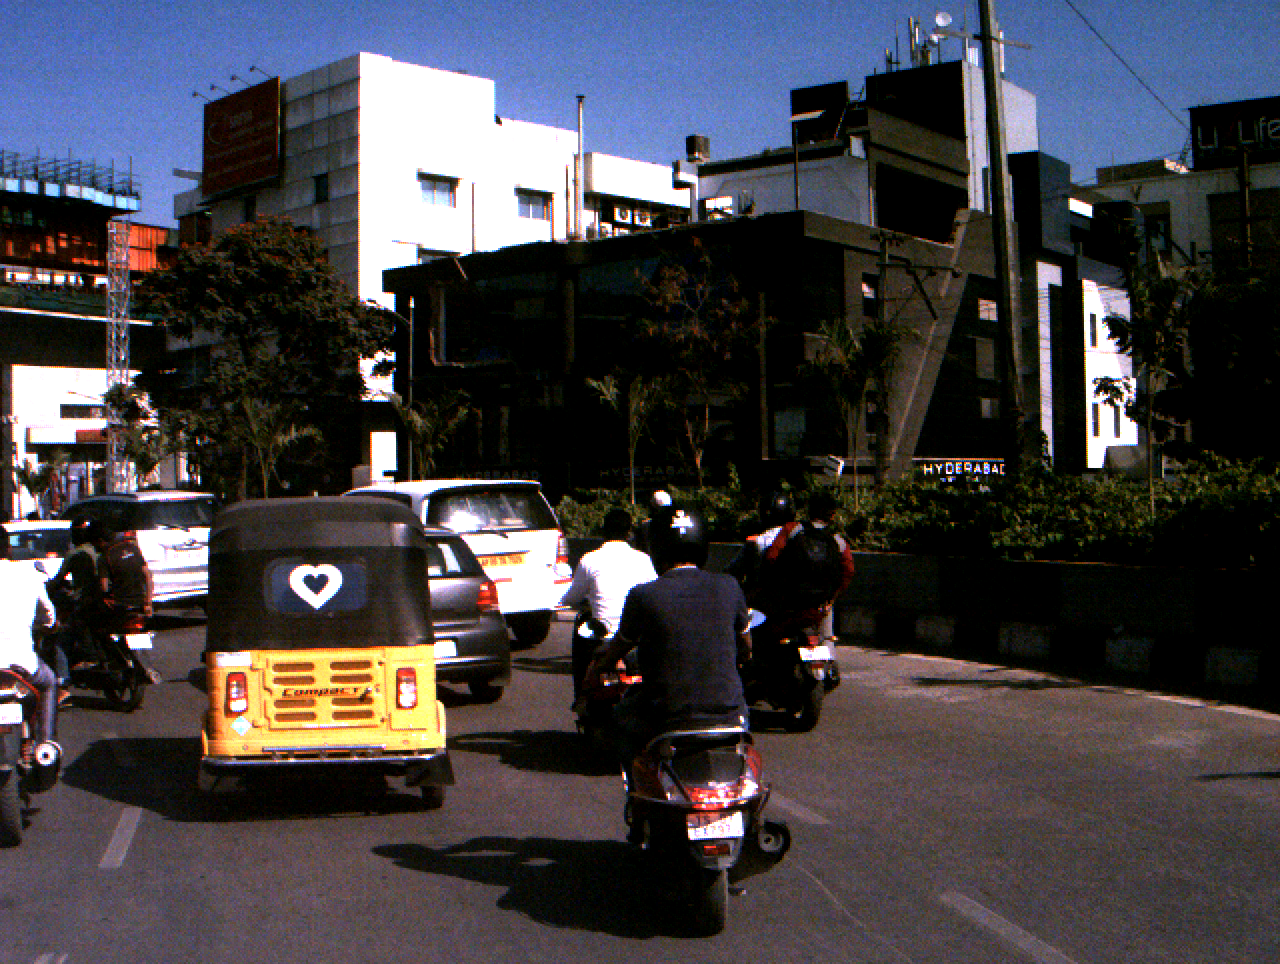

In [6]:
img

In [7]:
np_img = np.array(img)

In [8]:
np_img.min(), np_img.max()

(0, 255)

In [9]:
np_img.shape

(964, 1280, 3)

## Encoding Image Array to Byte String

In [10]:
def encode_arr(array):
    pil_img = Image.fromarray((array).astype(np.uint8), 'RGB')
    buffered = io.BytesIO()
    pil_img.save(buffered, format="JPEG")
    img_bytes = base64.b64encode(buffered.getvalue())

    img_string = img_bytes.decode()
    
    return img_string

## Decoding Byte String Data

In [11]:
def decode_data(encd_str):
    img = Image.open(io.BytesIO(base64.decodebytes(bytes(encd_str, "utf-8"))))
    
    np_arr = np.array(img)
    
    return np_arr

# Importing Requests

In [12]:
import requests

## Testing Custom image

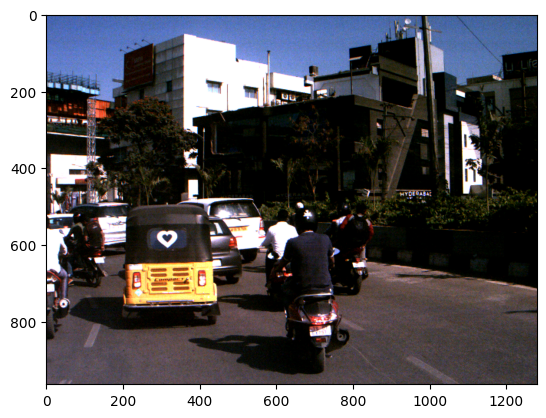

In [13]:
plt.imshow((np_img))
plt.show()

In [14]:
np_img.shape

(964, 1280, 3)

In [15]:
inp_str = encode_arr(np_img)

In [16]:
data = {"image": inp_str}

In [17]:
response = requests.post("http://127.0.0.1:8000/predict", 
                        json = data)

In [18]:
response.status_code

200

In [19]:
result = response.json()

In [20]:
result.keys()

dict_keys(['output'])

In [21]:
output_str = result['output']

In [22]:
output_arr = decode_data(output_str)

In [23]:
output_arr.shape

(964, 1280, 3)

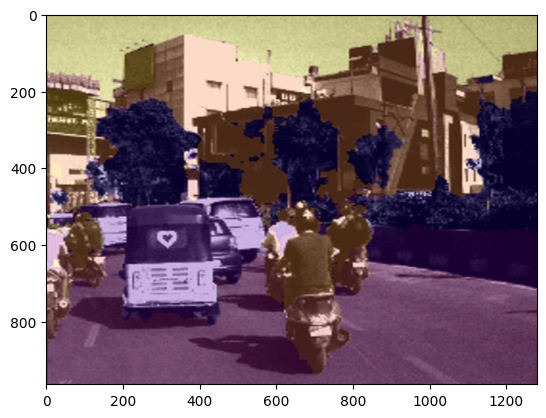

In [24]:
plt.imshow(output_arr)
plt.show()

## Testing api using requests

### local API

In [25]:
with open("../base64.txt", 'r') as f:
    obj_str = f.read()

In [26]:
data = {"image": obj_str}

In [27]:
data_arr = decode_data(obj_str)
data_arr.shape

(1080, 1920, 3)

In [28]:
response = requests.post("http://127.0.0.1:8000/predict", 
                        json = data)

In [29]:
response.status_code

200

In [30]:
result = response.json()

In [31]:
result.keys()

dict_keys(['output'])

In [32]:
output = result['output']

In [33]:
np_arr = decode_data(output)

In [34]:
np_arr.shape

(1080, 1920, 3)

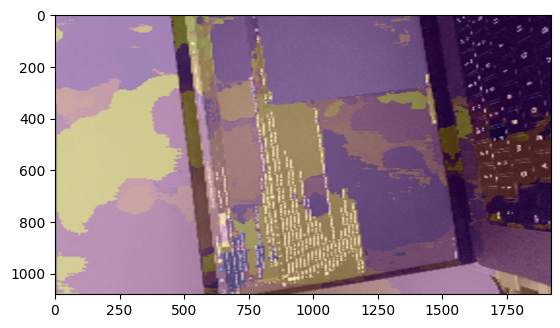

In [35]:
plt.imshow(np_arr)

### Deployed API

In [26]:
response = requests.post("https://8bbd-2402-8100-2103-c3ec-9c57-4742-46c8-9f77.in.ngrok.io/predict",
         json = data)

In [27]:
response.status_code

200

In [28]:
result = response.json()

In [29]:
output = result['output']

In [30]:
np_arr = decode_data(output)

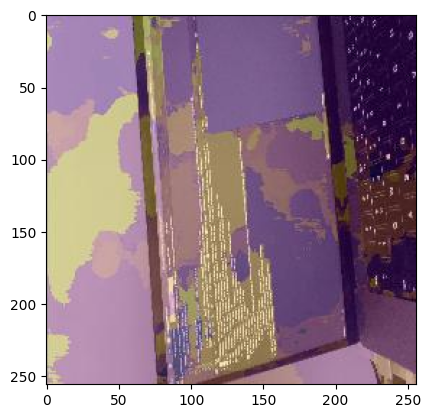

In [31]:
plt.imshow(np_arr)

## Logging

In [38]:
import logging

In [ ]:
logging.config.fileConfig('logging.conf', disable_existing_loggers=False)

logger = logging.getLogger(__name__)

In [ ]:
logger.info(f"rid={idem} start request data_type={type(inp_img.image)} data_len={len(inp_img.image)} data={inp_img.image}")